In [25]:
import pandas as pd

In [26]:
#Frecuencia de nombres de recien nacidos en los EEUU
names2010 = pd.read_csv("babynames/yob2017.txt", names=['names', 'sex', 'births'])
names2010.head()

,names,sex,births
0,Emma,F,19738
1,Olivia,F,18632
2,Ava,F,15902
3,Isabella,F,15100
4,Sophia,F,14831


In [27]:
#Births = cantidad de nacimientos en el año x.
#cantidad total de nacimientos agrupados por sexo.
names2010.groupby(by='sex').births.sum()

sex
F    1711811
M    1834490
Name: births, dtype: int64

In [28]:
#unir todos los datos de todos los años en un solo D.frame

years = range(1880, 2017)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

#concateno todo en un solo frame

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [29]:
#Numero de nacimientos por año.
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


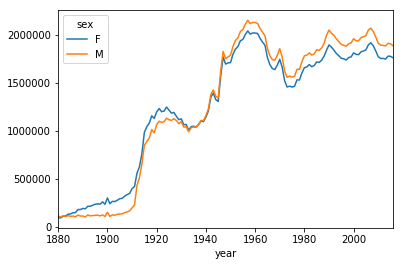

In [31]:
import matplotlib.pyplot as plt
total_births.plot()
#Visualización de nacimientos por sexo entre los 80 y 2017.

In [32]:
#agrego una columna donde me indica la fraccion de bebes
#que recibien el nombre en particular en dado año.
#0.0N = N de cada 100 bebes recibieron el nombre.

def add_prop(group):
    
    births = group.births.astype(float)
    
    group['prop'] = births/ births.sum()
    
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [33]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [34]:
#Control de sensatez en la columna 'prop'
#Verificacion de que las fracciones esten correctas en dado año.
#La suma de todas las fracciones en x años debe ser igual o muy cerca de 1.

import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [10]:
#Top nombres de recien nacidos en cada años.
#def get_top100(group):
#    return group.sort_values(by='births', ascending=False)[:100]

#grouped = names.groupby(['year', 'sex'])
#top100 = grouped.apply(get_top100)

#Tendencia de nombres de los nacidos entre los 80' y 2017.

#top100

In [35]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:100])

top100 = pd.concat(pieces, ignore_index=True)

top100.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [36]:
boys = top100[top100.sex == 'M']
girls = top100[top100.sex == 'F']

total_births = top100.pivot_table('births', index='year' ,columns='name', aggfunc=sum)
total_births.head()
    

name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adeline,Adrian,Agnes,...,Willow,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,NaN,473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,NaN,424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,NaN,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,NaN,623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,NaN,703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78FCC3F60>,
      dtype=object)

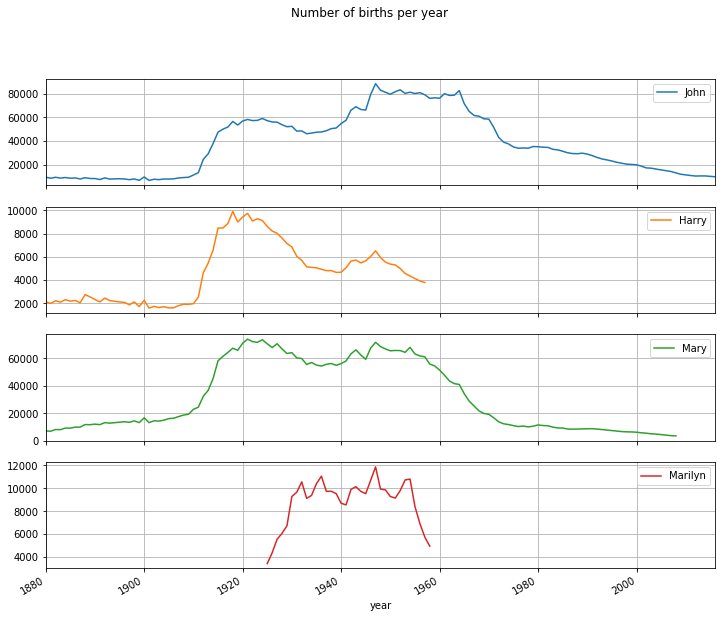

In [13]:
#Grafica frecuancia de nombres especificos a lo largo de los años.
#Nombres dentro del data set .
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12,10), grid=True, title='Number of births per year')

C:\Users\Gorila\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


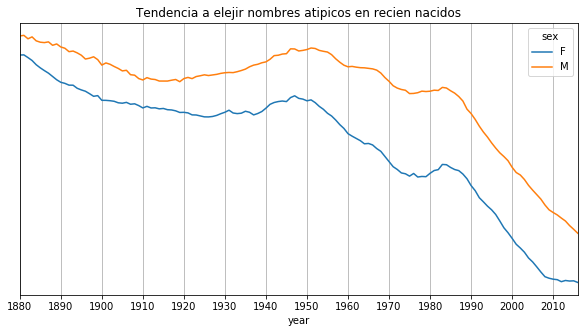

In [37]:
#Midiendo la diversidad de nombres a lo largo del tiempo. 
#En el grafico anterior se ve que hay una tendencia a no elegir esos nombres.
#Hipotesis => los padres estan elijiendo nombres comunes con mas frecuencia

table = top100.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(figsize=(10,5), grid=True, yticks=np.linspace(0, 1.2, 1.3), xticks=range(1880,2020,10), 
           title='Tendencia a elejir nombres atipicos en recien nacidos')

In [38]:
# Cambios de la ultima letra en los nombres de los niños durante los 
# ultimos 100 años
#Obtengo la ultima letra de todos los nombres en el registro
get_last_letter = lambda x: x[-1]
last_letter = names.name.map(get_last_letter)

#nombrando a la columna
last_letter.name = 'last_letter'

#indexo por ultima letra
table = names.pivot_table('births', index=last_letter, columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2007      2008      2009   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   34748.0   33020.0   31617.0   
b                NaN      NaN      NaN  ...   42229.0   40080.0   39082.0   
c                NaN      NaN      NaN  ...   26911.0   25389.0   24150.0   
d             1027.0   1298.0   1374.0  ...   50735.0   48062.0   46345.0   
e            54352.0  66748.0  66662.0  ...  144002.0  141334.0  135981.0   

sex                                                                      \
year             2010      2011      2012      2013      2014      2015   
last_letter                                                               
a             28859.0   27439.0   27201.0   27419.0   28247.0   28952.0   
b             39264.0   36667.0   34706.0   33226.0   31353.0   29557.0   
c             23341.0   23125.0   24268.0   24047.0   23805.0   23106.0   
d             44817.0   43231.0   42457.0   42658.0   43990.0   43717.0   
e            130228.0  128748.0  128430.0  132126.0  131978.0  128384.0   

sex                    
year             2016  
last_letter            
a             29647.0  
b             26926.0  
c             22006.0  
d             42917.0  
e            125781.0  

[5 rows x 274 columns]

In [39]:
#Elijo intervalos de años, en los ultimos 100 años.

subtable = table.reindex(columns=[1900, 1950, 2000, 2010], level='year')
subtable.head()

sex                 F                                      M            \
year             1900      1950      2000      2010     1900      1950   
last_letter                                                              
a             89900.0  576602.0  675963.0  676646.0    870.0    4029.0   
b                 NaN      17.0     372.0     455.0    372.0    1634.0   
c                 NaN      15.0     525.0     955.0    299.0    6498.0   
d              3670.0    4409.0    4382.0    2640.0  15485.0  263750.0   
e            107070.0  376913.0  318399.0  316665.0  22724.0  168692.0   

sex                              
year             2000      2010  
last_letter                      
a             40860.0   28859.0  
b             50919.0   39264.0  
c             27018.0   23341.0  
d             64326.0   44817.0  
e            148913.0  130228.0

In [40]:
#total de nacimientos en cada año.
subtable.sum()

sex  year
F    1900     299800.0
     1950    1713151.0
     2000    1815110.0
     2010    1774758.0
M    1900     150483.0
     1950    1790549.0
     2000    1962969.0
     2010    1915942.0
dtype: float64

In [41]:
#proporcion del total de nacimientos en cada año por sexo
#indexado por la ultima letra de los nombre
letter_prop = subtable/ subtable.sum().astype(float)
letter_prop.head()


sex                 F                                       M            \
year             1900      1950      2000      2010      1900      1950   
last_letter                                                               
a            0.299867  0.336574  0.372409  0.381261  0.005781  0.002250   
b                 NaN  0.000010  0.000205  0.000256  0.002472  0.000913   
c                 NaN  0.000009  0.000289  0.000538  0.001987  0.003629   
d            0.012241  0.002574  0.002414  0.001488  0.102902  0.147301   
e            0.357138  0.220012  0.175416  0.178427  0.151007  0.094212   

sex                              
year             2000      2010  
last_letter                      
a            0.020815  0.015063  
b            0.025940  0.020493  
c            0.013764  0.012183  
d            0.032770  0.023392  
e            0.075861  0.067971

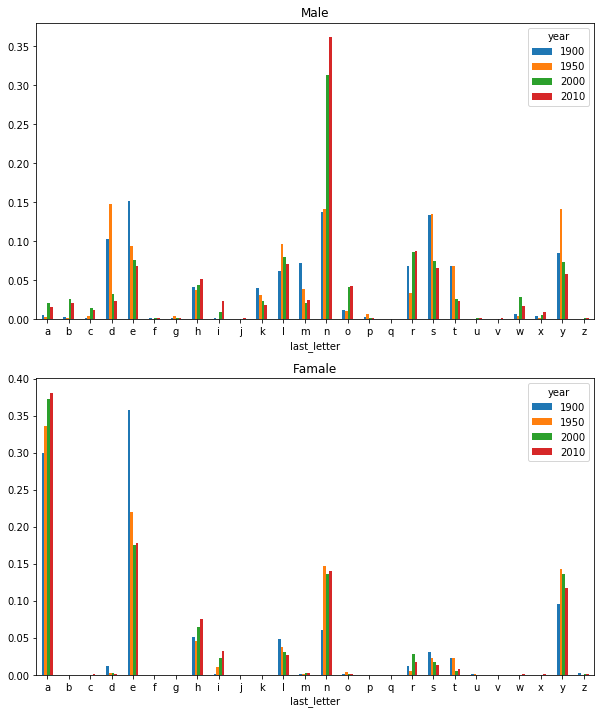

In [42]:
#Representacion grafica de la tendencia en los nombres a finalizar 
#con x letra...

import matplotlib.pyplot as plt

fid, axes = plt.subplots(2,1, figsize=(10,12))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Famale',
                     legend=True)